DDoS (Distributed Denial of Service) attack classification is the process of identifying and categorizing malicious network traffic that aims to overwhelm and disrupt the normal functioning of a server, service, or network. Using machine learning or deep learning techniques, network traffic data is analyzed to distinguish between benign and DDoS activity.

The goal is to build a model that can accurately detect DDoS attacks in real-time, enabling systems to take preventive or corrective action automatically. Features such as packet rates, flow duration, and byte patterns are commonly used for training classifiers like Random Forest, SVM, or neural networks.

This process plays a crucial role in cybersecurity, helping organizations defend against service outages and network damage caused by DDoS attacks. dataset[https://www.kaggle.com/datasets/chethuhn/network-intrusion-dataset]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import label_binarize
from itertools import cycle

plt.style.use("ggplot")

In [2]:
df= pd.read_csv('/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

In [4]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [5]:
df.isnull().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [6]:
unique_values= {}
for i in df.columns:
    unique_values[i]= df[i].nunique()
pd.DataFrame(unique_values, index= ['unique_values']).T

,unique_values
Destination Port,23950
Flow Duration,187752
Total Fwd Packets,297
Total Backward Packets,367
Total Length of Fwd Packets,3831
...,...
Idle Mean,35285
Idle Std,5857
Idle Max,33002
Idle Min,48018


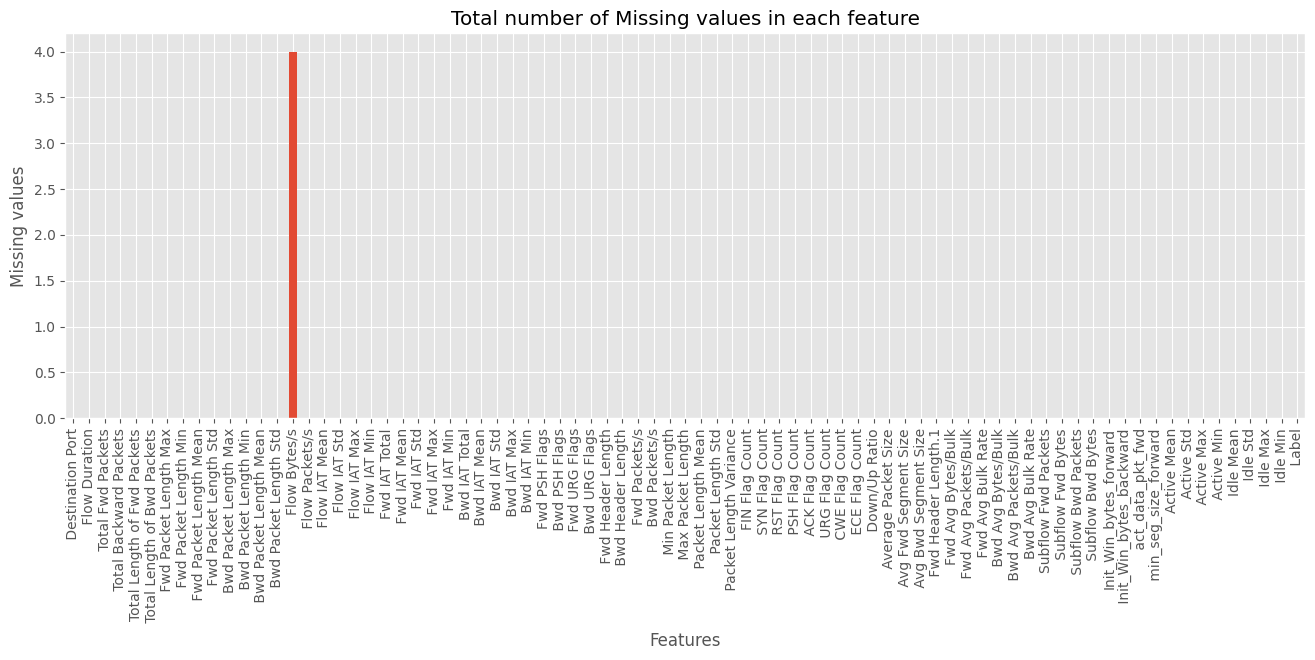

In [7]:
def plotMissingValues(dataframe):
    missing_values = dataframe.isnull().sum()
    fig = plt.figure(figsize=(16, 5))
    missing_values.plot(kind='bar')
    plt.xlabel("Features")
    plt.ylabel("Missing values")
    plt.title("Total number of Missing values in each feature")
    plt.show()

plotMissingValues(df)

In [8]:
df.columns = df.columns.str.strip()  
print(df.columns.tolist()) 

['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count

In [9]:
df['Label'] = df['Label'].map({'BENIGN': 0, 'DDoS': 1})

In [10]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

In [11]:
correlation= df.corr()['Label'].drop('Label').sort_values(ascending=False)
correlation

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Bwd Packet Length Mean         0.603299
Avg Bwd Segment Size           0.603299
Bwd Packet Length Max          0.577323
Bwd Packet Length Std          0.576155
Packet Length Mean             0.454283
Average Packet Size            0.453472
Packet Length Std              0.443749
Max Packet Length              0.414399
Packet Length Variance         0.408089
PSH Flag Count                 0.247740
Flow IAT Std                   0.129630
Flow IAT Mean                  0.127503
Fwd IAT Max                    0.105457
Flow IAT Max                   0.100654
Fwd IAT Std                    0.099651
ACK Flag Count                 0.096975
Idle Max                       0.096775
Idle Mean                      0.087114
Idle Std                       0.078023
Idle Min                       0.061243
Subflow Bwd Bytes              0.041244
Total Length of Bwd Packets    0.041244
Fwd IAT Total                  0.040565
Active Min                     0.033821
Flow Duration                  0.025923


In [12]:
cols_to_drop = ['act_data_pkt_fwd', 'Active Max', 'RST Flag Count', 'ECE Flag Count', 'Total Fwd Packets', 'Subflow Fwd Packets',
                'Flow Bytes/s', 'Flow IAT Min', 'Fwd Header Length.1', 'Fwd Header Length', 'Init_Win_bytes_forward', 'FIN Flag Count',
                'Fwd IAT Min', 'Bwd IAT Min', 'Total Backward Packets', 'Subflow Bwd Packets', 'Active Std', 'Bwd Header Length',
                'Bwd Packets/s', 'Init_Win_bytes_backward', 'Fwd Packets/s', 'Flow Packets/s', 'Fwd Packet Length Min', 'Bwd IAT Mean',
                'Fwd PSH Flags', 'SYN Flag Count', 'Bwd IAT Std', 'Bwd IAT Max', 'Fwd Packet Length Std', 'Down/Up Ratio', 'Bwd IAT Total',
                'Subflow Fwd Bytes', 'Total Length of Fwd Packets', 'Fwd Packet Length Max', 'Avg Fwd Segment Size', 'Fwd Packet Length Mean',
                'Bwd Packet Length Min', 'min_seg_size_forward', 'Min Packet Length', 'URG Flag Count', 'Destination Port', 'Bwd PSH Flags',
                'Fwd URG Flags', 'Bwd URG Flags', 'CWE Flag Count', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate',
                'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']
df = df.drop(columns=cols_to_drop)

In [13]:
round(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Flow Duration,225745.0,16241649.0,31524374.0,-1.0,71180.0,1452333.0,8805237.0,119999937.0
Total Length of Bwd Packets,225745.0,5960.0,39218.0,0.0,0.0,164.0,11601.0,5172346.0
Bwd Packet Length Max,225745.0,2736.0,3705.0,0.0,0.0,99.0,5840.0,11680.0
Bwd Packet Length Mean,225745.0,891.0,1120.0,0.0,0.0,92.0,1934.0,5800.0
Bwd Packet Length Std,225745.0,1230.0,1733.0,0.0,0.0,2.0,2437.0,8195.0
Flow IAT Mean,225745.0,1580587.0,2701596.0,-1.0,19182.0,224517.0,2013459.0,107000000.0
Flow IAT Std,225745.0,4248569.0,7622819.0,0.0,19104.0,564168.0,4033232.0,69200000.0
Flow IAT Max,225745.0,13489774.0,26701717.0,-1.0,61178.0,1422624.0,8358910.0,120000000.0
Fwd IAT Total,225745.0,15396523.0,31608258.0,0.0,129.0,23710.0,7869855.0,120000000.0
Fwd IAT Mean,225745.0,2540610.0,5934694.0,0.0,110.0,10329.0,2017643.0,120000000.0


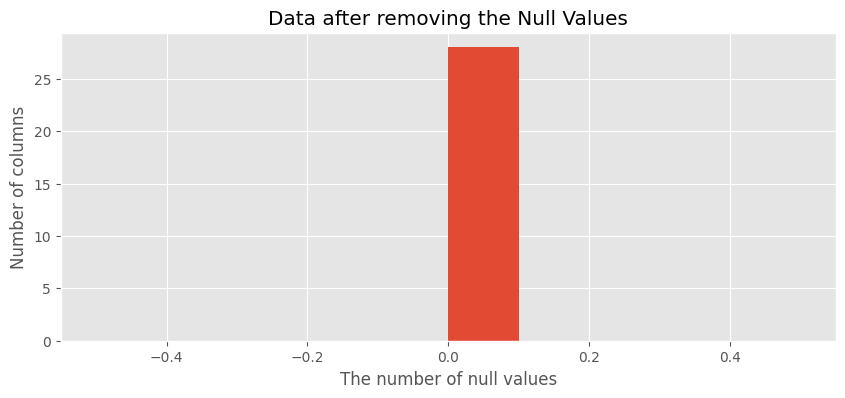

In [14]:
plt.figure(1,figsize=( 10,4))
plt.hist( df.isna().sum())
plt.title('Data after removing the Null Values')
plt.xlabel('The number of null values')
plt.ylabel('Number of columns')
plt.show()

In [16]:
new_df= df

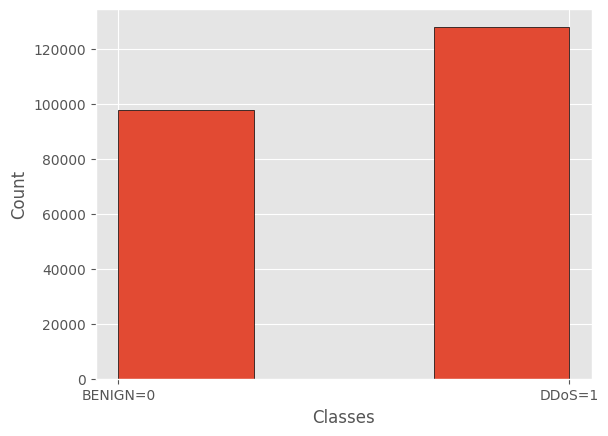

In [17]:
plt.hist(new_df['Label'], bins=[0, 0.3,0.7,1], edgecolor='black') 
plt.xticks([0, 1], labels=['BENIGN=0', 'DDoS=1'])
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

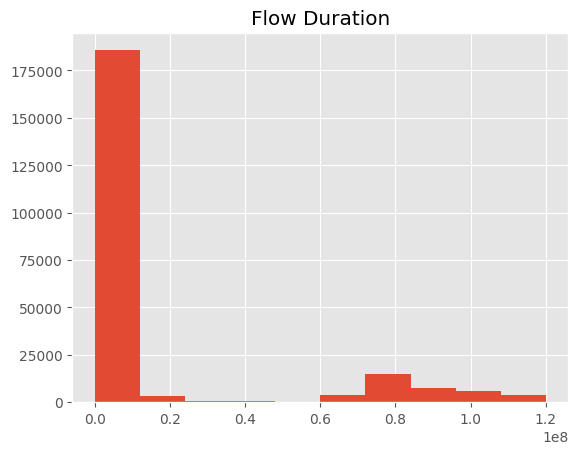

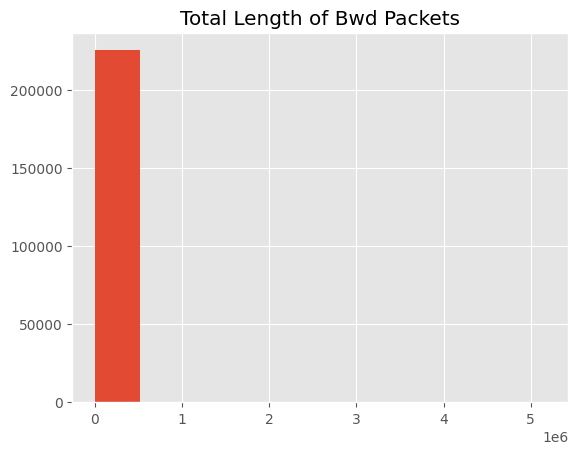

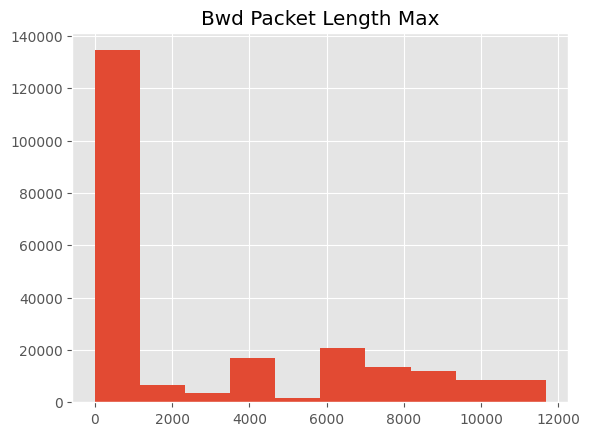

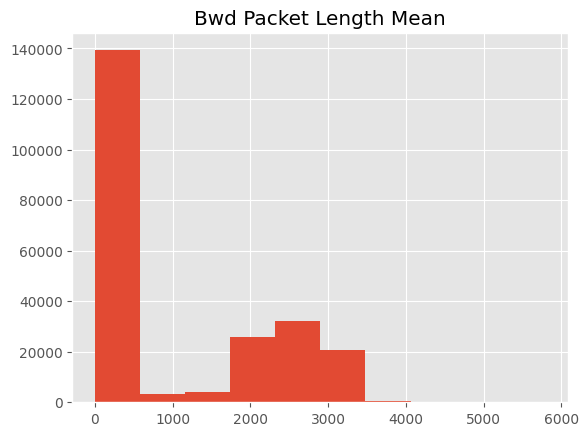

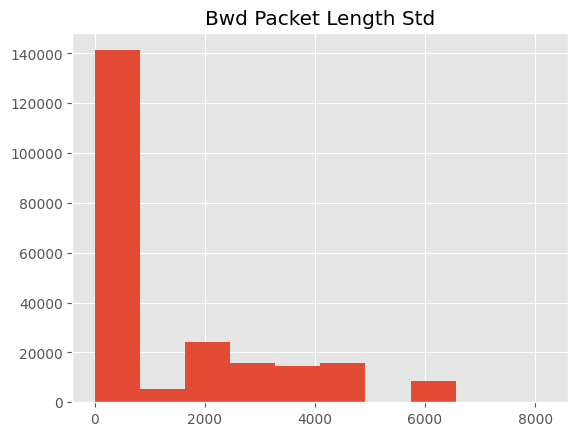

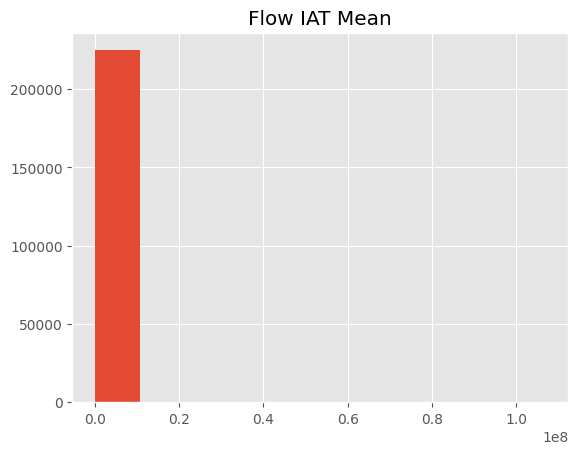

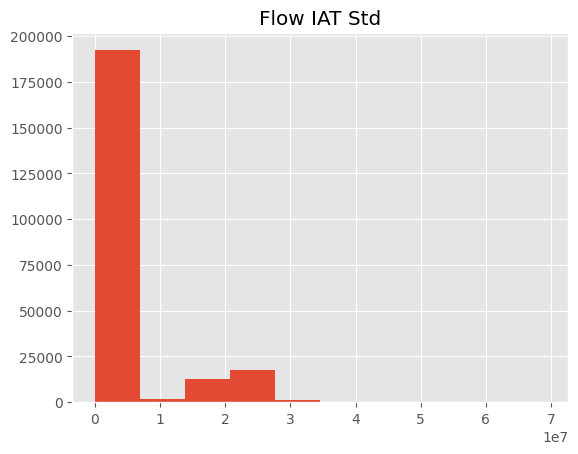

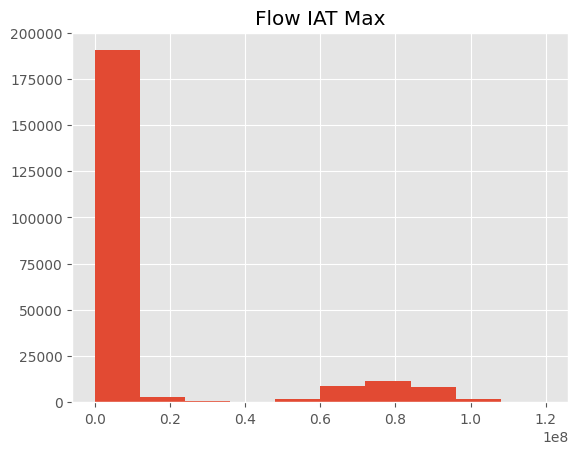

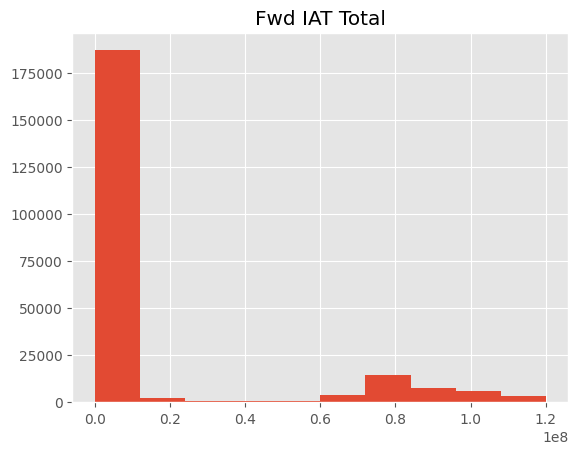

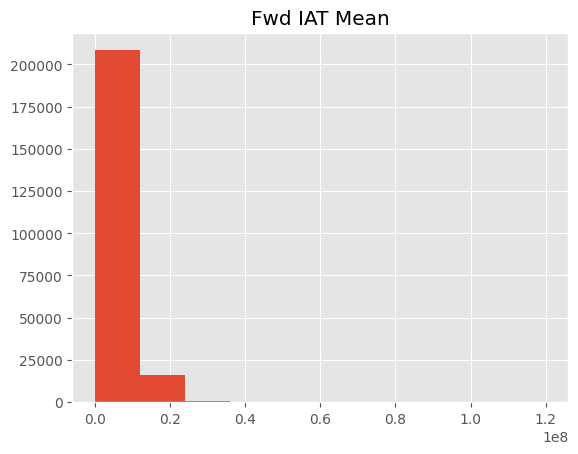

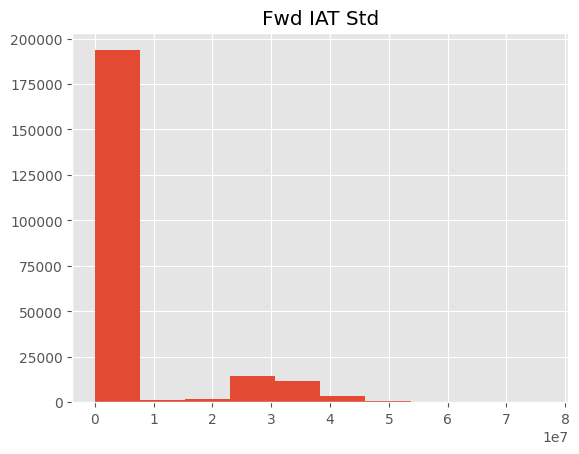

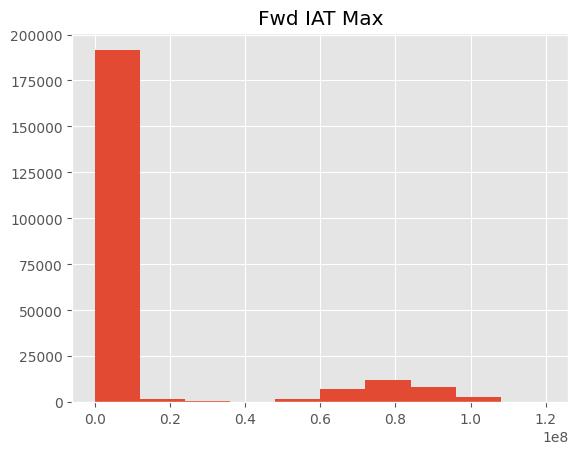

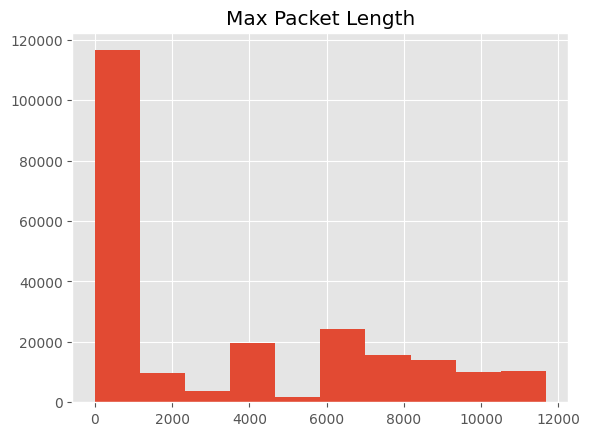

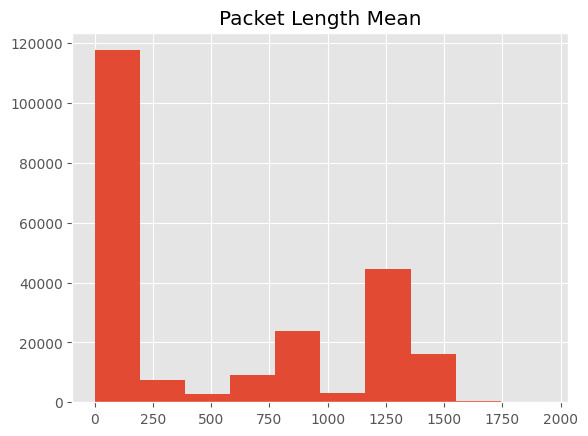

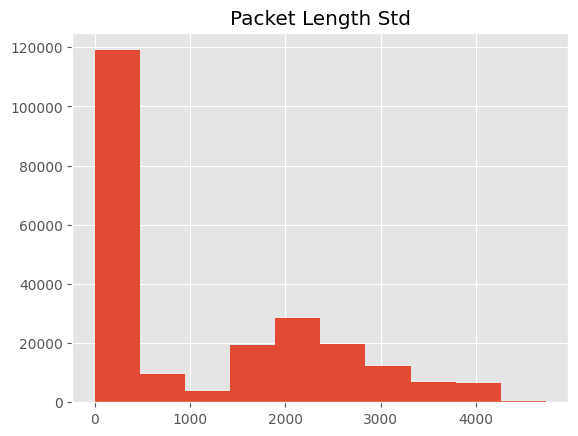

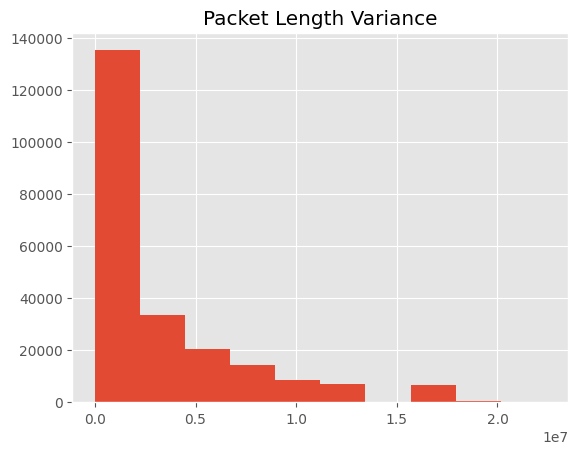

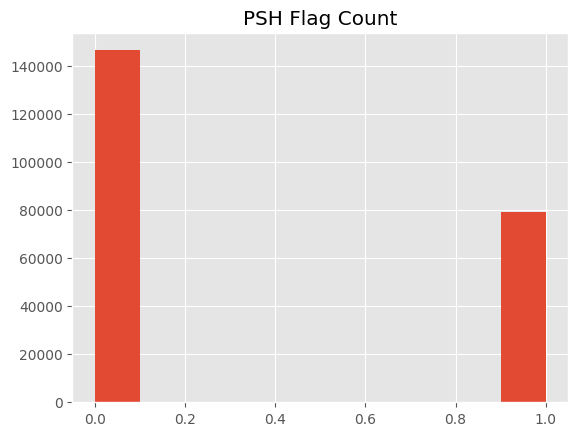

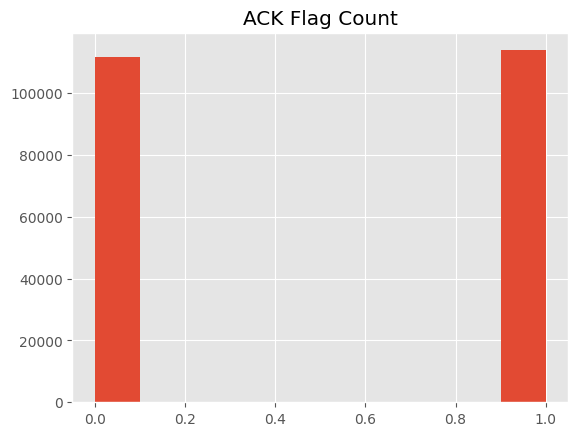

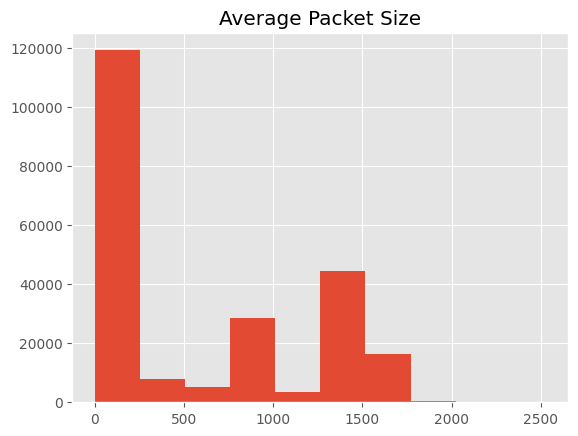

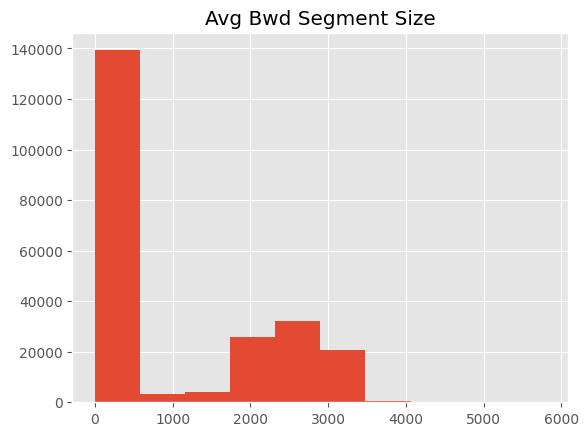

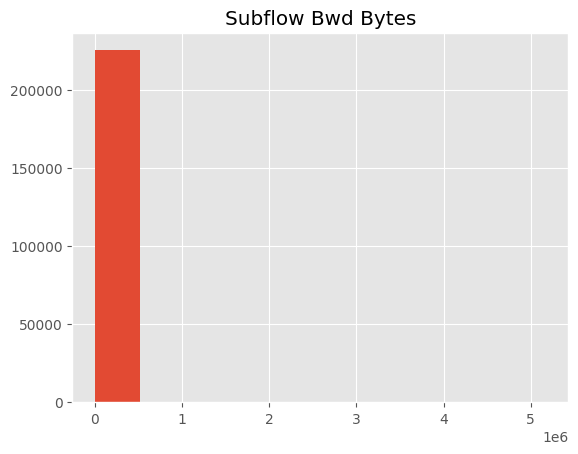

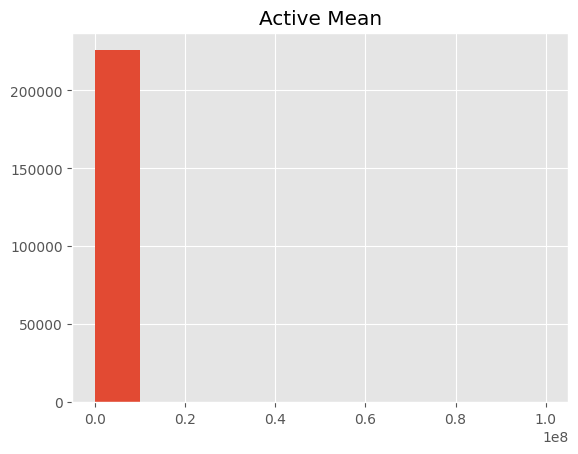

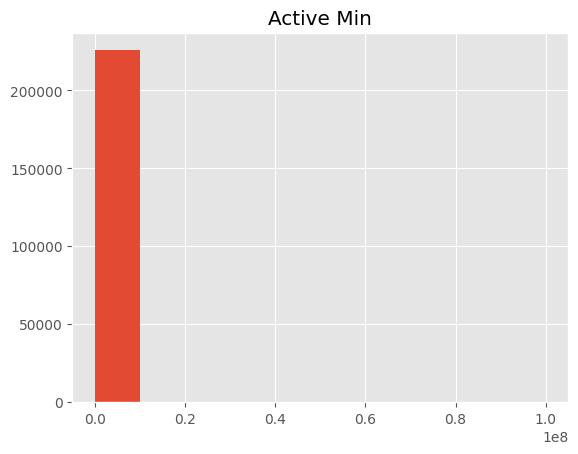

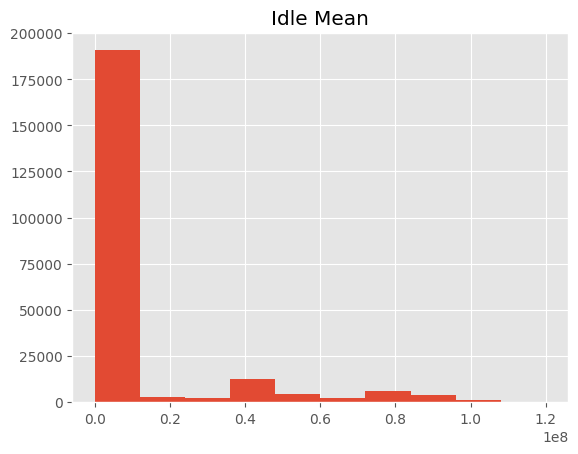

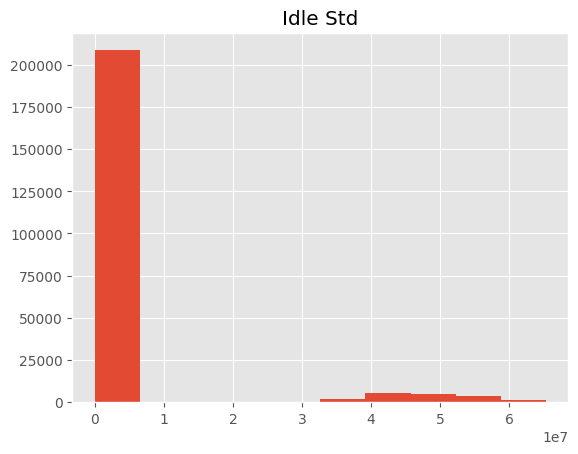

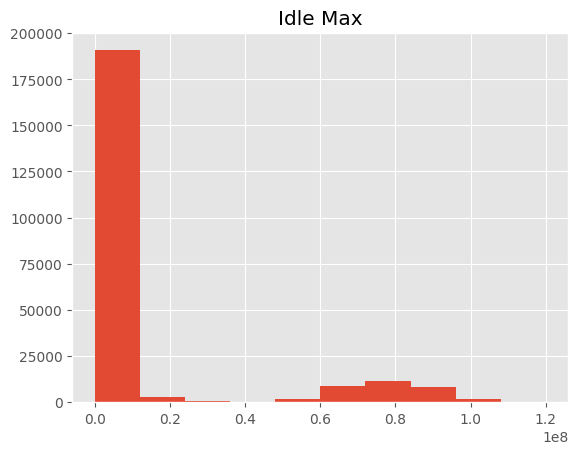

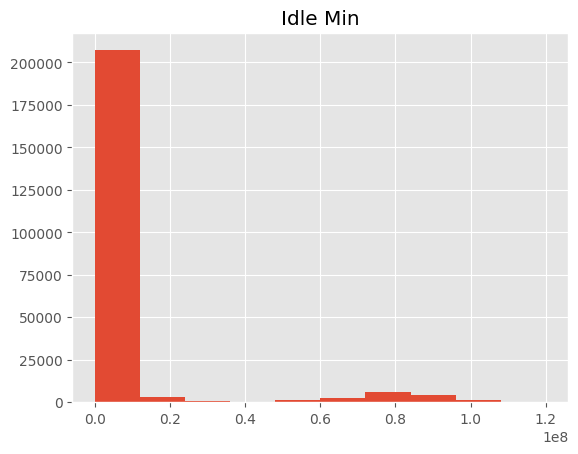

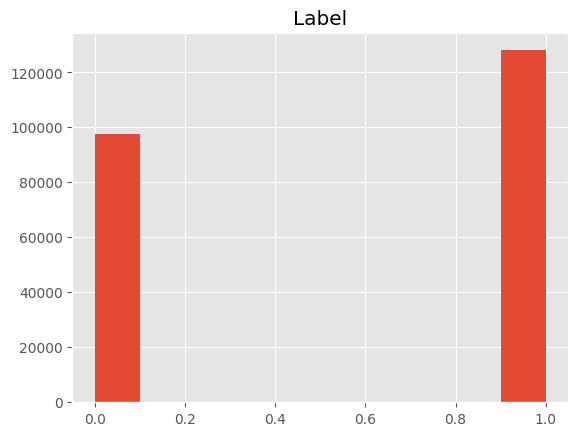

In [18]:
plt.figure(5)
for col in new_df.columns:
    plt.hist(new_df[col])
    plt.title(col)
    plt.show()

In [19]:
X1 = np.array(new_df).astype(np.float64)
y1 = np.array(new_df['Label'])

# Data splitting into train and test

In [20]:
X = new_df.drop('Label', axis=1)
y = new_df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print("The train dataset size = ",X_train.shape)
print("The test dataset size = ",X_test.shape)

The train dataset size =  (180596, 27)
The test dataset size =  (45149, 27)


In [26]:
from sklearn.metrics import classification_report


rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19405
           1       1.00      1.00      1.00     25744

    accuracy                           1.00     45149
   macro avg       1.00      1.00      1.00     45149
weighted avg       1.00      1.00      1.00     45149



In [31]:
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

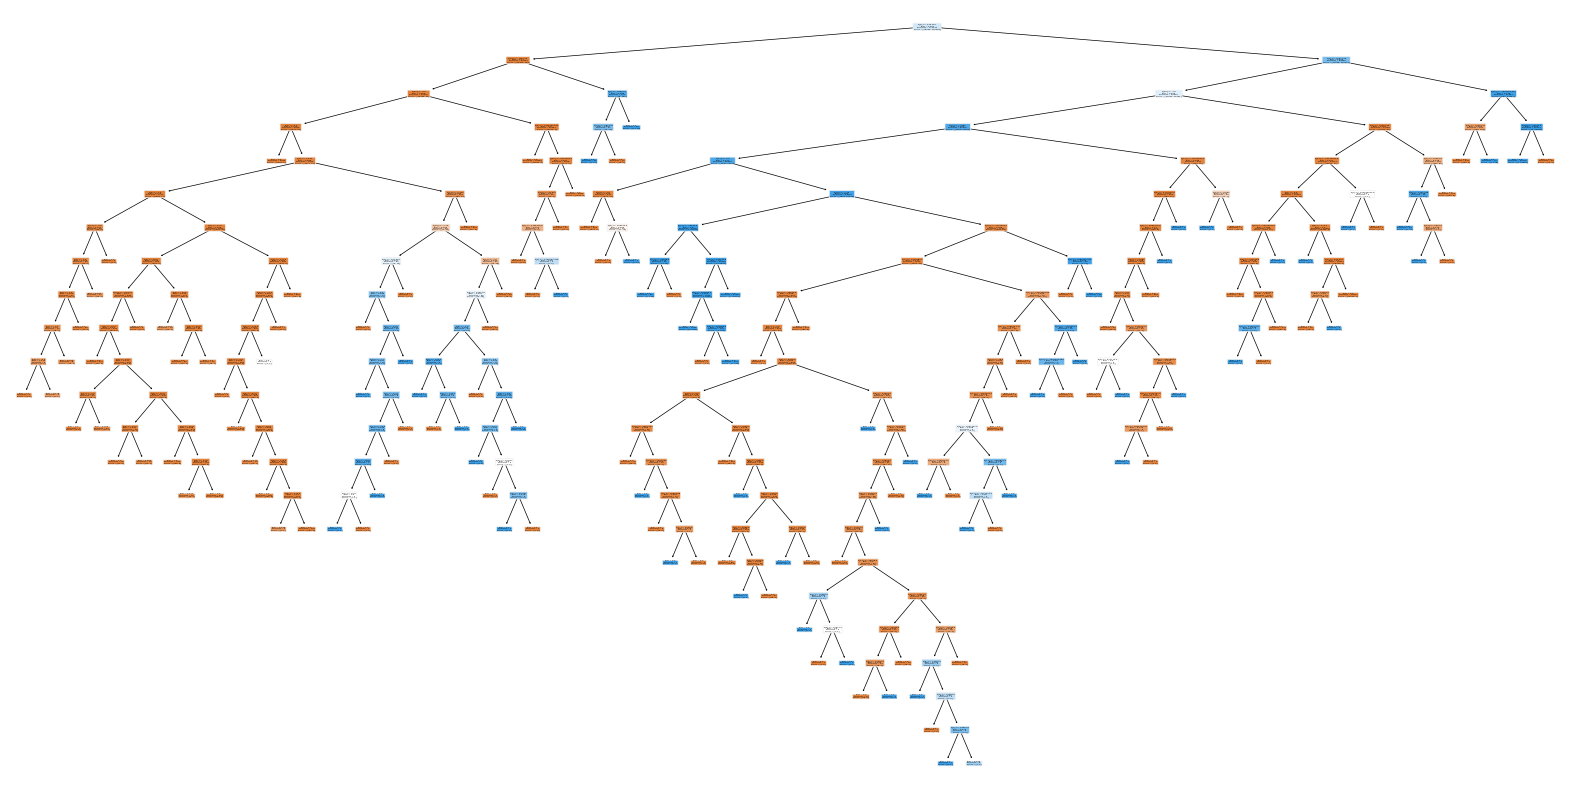

In [25]:
from sklearn.tree import plot_tree

estimator = rf_model.estimators_[0]  

plt.figure(figsize=(20, 10))
plot_tree(estimator, filled=True, rounded=True)
plt.show()

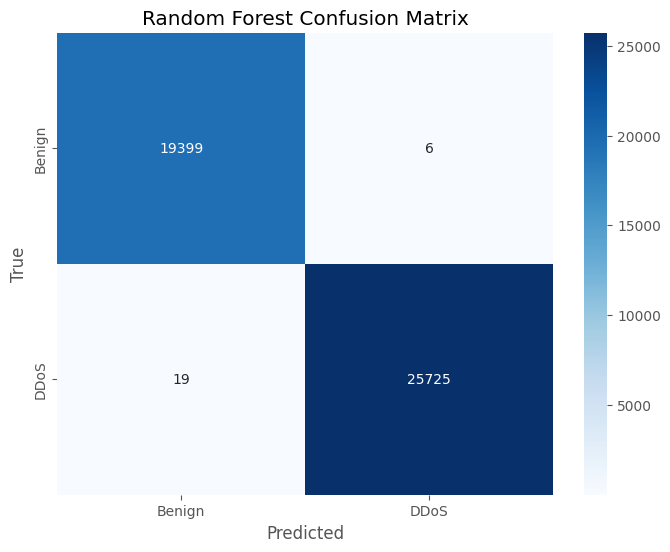

In [32]:
plot_confusion_matrix(y_test, rf_pred, ['Benign', 'DDoS'], 'Random Forest Confusion Matrix')

In [27]:
nn_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=10, random_state=42)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)
print(classification_report(y_test, nn_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     19405
           1       0.99      0.99      0.99     25744

    accuracy                           0.99     45149
   macro avg       0.99      0.99      0.99     45149
weighted avg       0.99      0.99      0.99     45149



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


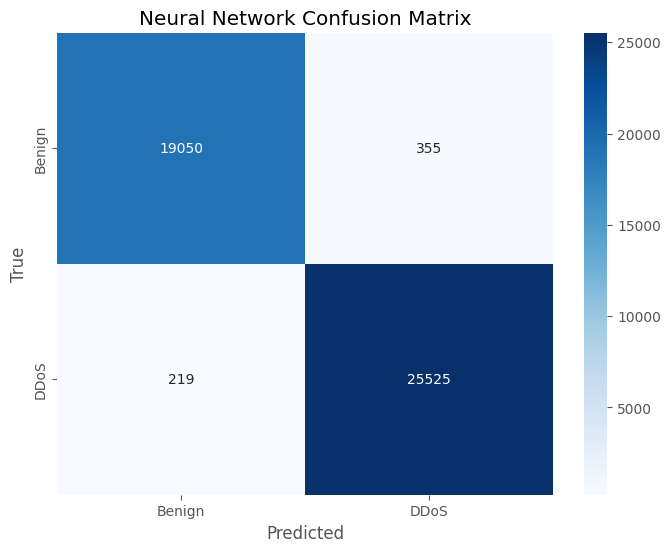

In [34]:
plot_confusion_matrix(y_test, nn_pred, ['Benign', 'DDoS'], 'Neural Network Confusion Matrix')

In [29]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.97      0.69      0.80     19405
           1       0.81      0.99      0.89     25744

    accuracy                           0.86     45149
   macro avg       0.89      0.84      0.85     45149
weighted avg       0.88      0.86      0.85     45149



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


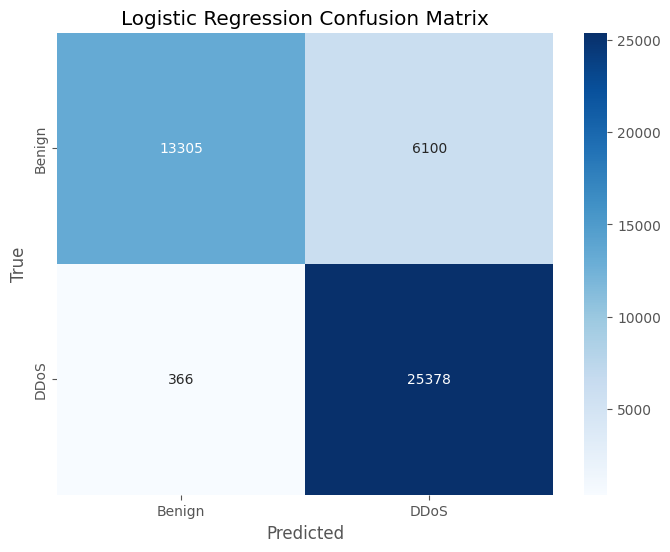

In [33]:
plot_confusion_matrix(y_test, lr_pred, ['Benign', 'DDoS'], 'Logistic Regression Confusion Matrix')

# Model comparison

In [36]:
rf_proba = rf_model.predict_proba(X_test)
lr_proba = lr_model.predict_proba(X_test)
nn_proba = nn_model.predict_proba(X_test)


rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba[:, 1])
rf_auc = auc(rf_fpr, rf_tpr)

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba[:, 1])
lr_auc = auc(lr_fpr, lr_tpr)

nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_proba[:, 1])
nn_auc = auc(nn_fpr, nn_tpr)

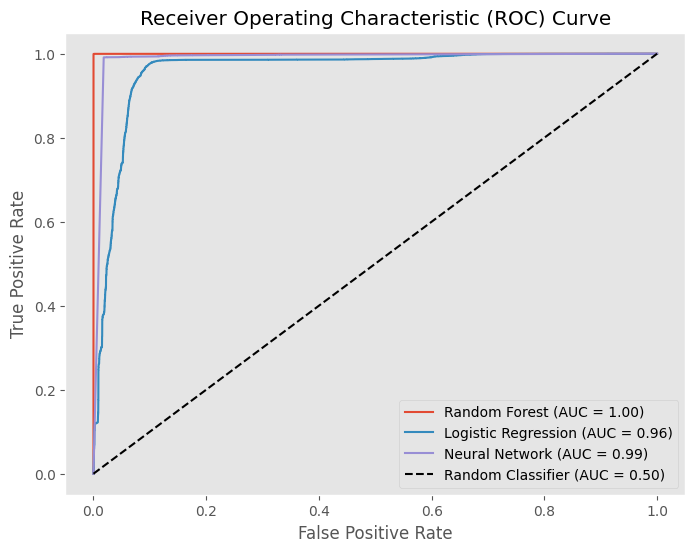

In [37]:
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Classifier (AUC = 0.50)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()